In [1]:
import torch
import torchvision
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time
import os
import copy
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import seaborn as sns
from torchvision import datasets, transforms, models
from torch.utils.data import Dataset, random_split, DataLoader
import cv2
from PIL import Image

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [3]:
import zipfile

# Path to the zip file
zip_file_path = 'TinyImageNet.zip'

# Destination directory to unzip files
extract_dir = './'

# Unzipping the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)


In [4]:
path = './tiny-imagenet-200/train/'

subfolders = [name for name in os.listdir(path) if os.path.isdir(os.path.join(path, name))]
subfolders.sort()
subfolders

['n01443537',
 'n01629819',
 'n01641577',
 'n01644900',
 'n01698640',
 'n01742172',
 'n01768244',
 'n01770393',
 'n01774384',
 'n01774750',
 'n01784675',
 'n01855672',
 'n01882714',
 'n01910747',
 'n01917289',
 'n01944390',
 'n01945685',
 'n01950731',
 'n01983481',
 'n01984695',
 'n02002724',
 'n02056570',
 'n02058221',
 'n02074367',
 'n02085620',
 'n02094433',
 'n02099601',
 'n02099712',
 'n02106662',
 'n02113799',
 'n02123045',
 'n02123394',
 'n02124075',
 'n02125311',
 'n02129165',
 'n02132136',
 'n02165456',
 'n02190166',
 'n02206856',
 'n02226429',
 'n02231487',
 'n02233338',
 'n02236044',
 'n02268443',
 'n02279972',
 'n02281406',
 'n02321529',
 'n02364673',
 'n02395406',
 'n02403003',
 'n02410509',
 'n02415577',
 'n02423022',
 'n02437312',
 'n02480495',
 'n02481823',
 'n02486410',
 'n02504458',
 'n02509815',
 'n02666196',
 'n02669723',
 'n02699494',
 'n02730930',
 'n02769748',
 'n02788148',
 'n02791270',
 'n02793495',
 'n02795169',
 'n02802426',
 'n02808440',
 'n02814533',
 'n028

In [5]:
#getting classes names
classes_file_path = './tiny-imagenet-200/words.txt'
list_classes =[]
with open(classes_file_path, 'r') as file:
    for line in file:
        class_details = {'class code':line.split('\t')[0], 'class name': line.split('\t')[1].split('\n')[0]}
        list_classes.append(class_details)
len(list_classes)

82115

In [6]:
classes =[]
for code in subfolders:
    for cls in list_classes:
        if cls['class code'] == code:
            classes.append(cls['class name'])
classes


['goldfish, Carassius auratus',
 'European fire salamander, Salamandra salamandra',
 'bullfrog, Rana catesbeiana',
 'tailed frog, bell toad, ribbed toad, tailed toad, Ascaphus trui',
 'American alligator, Alligator mississipiensis',
 'boa constrictor, Constrictor constrictor',
 'trilobite',
 'scorpion',
 'black widow, Latrodectus mactans',
 'tarantula',
 'centipede',
 'goose',
 'koala, koala bear, kangaroo bear, native bear, Phascolarctos cinereus',
 'jellyfish',
 'brain coral',
 'snail',
 'slug',
 'sea slug, nudibranch',
 'American lobster, Northern lobster, Maine lobster, Homarus americanus',
 'spiny lobster, langouste, rock lobster, crawfish, crayfish, sea crawfish',
 'black stork, Ciconia nigra',
 'king penguin, Aptenodytes patagonica',
 'albatross, mollymawk',
 'dugong, Dugong dugon',
 'Chihuahua',
 'Yorkshire terrier',
 'golden retriever',
 'Labrador retriever',
 'German shepherd, German shepherd dog, German police dog, alsatian',
 'standard poodle',
 'tabby, tabby cat',
 'Persia

In [7]:
final_classes = []
for i, cls in enumerate(classes):
    new_name = cls.split(',')[0]
    final_classes.append(new_name)
print(final_classes)
print(len(final_classes))

['goldfish', 'European fire salamander', 'bullfrog', 'tailed frog', 'American alligator', 'boa constrictor', 'trilobite', 'scorpion', 'black widow', 'tarantula', 'centipede', 'goose', 'koala', 'jellyfish', 'brain coral', 'snail', 'slug', 'sea slug', 'American lobster', 'spiny lobster', 'black stork', 'king penguin', 'albatross', 'dugong', 'Chihuahua', 'Yorkshire terrier', 'golden retriever', 'Labrador retriever', 'German shepherd', 'standard poodle', 'tabby', 'Persian cat', 'Egyptian cat', 'cougar', 'lion', 'brown bear', 'ladybug', 'fly', 'bee', 'grasshopper', 'walking stick', 'cockroach', 'mantis', 'dragonfly', 'monarch', 'sulphur butterfly', 'sea cucumber', 'guinea pig', 'hog', 'ox', 'bison', 'bighorn', 'gazelle', 'Arabian camel', 'orangutan', 'chimpanzee', 'baboon', 'African elephant', 'lesser panda', 'abacus', 'academic gown', 'altar', 'apron', 'backpack', 'bannister', 'barbershop', 'barn', 'barrel', 'basketball', 'bathtub', 'beach wagon', 'beacon', 'beaker', 'beer bottle', 'bikini

# creating classes file for val data

In [8]:
val_path = './tiny-imagenet-200/val/val_annotations.txt'
val_labels = []
with open(val_path, 'r') as file:
    for line in file:
        class_code = line.split()[1]
        class_label = subfolders.index(class_code)
        val_labels.append(class_label)
print(val_labels)
print(len(val_labels))

[107, 139, 140, 69, 69, 161, 147, 73, 145, 39, 158, 188, 39, 120, 21, 79, 33, 165, 153, 119, 123, 124, 18, 1, 170, 141, 171, 158, 79, 25, 121, 179, 124, 130, 176, 86, 6, 129, 142, 127, 33, 33, 44, 40, 110, 40, 159, 184, 57, 80, 9, 34, 39, 14, 75, 199, 10, 99, 66, 160, 69, 177, 25, 101, 102, 173, 118, 101, 0, 95, 7, 131, 199, 113, 36, 5, 30, 4, 187, 16, 53, 23, 90, 109, 176, 161, 44, 20, 21, 35, 83, 23, 184, 63, 129, 55, 30, 25, 166, 145, 90, 42, 38, 130, 110, 36, 194, 118, 32, 151, 174, 67, 109, 172, 138, 53, 57, 101, 37, 131, 98, 80, 125, 50, 73, 172, 196, 164, 139, 78, 2, 190, 120, 165, 185, 155, 139, 131, 47, 10, 170, 15, 84, 173, 24, 137, 180, 124, 158, 30, 91, 189, 29, 121, 55, 111, 51, 154, 101, 59, 21, 184, 14, 47, 162, 63, 181, 67, 75, 131, 129, 185, 164, 159, 113, 103, 49, 125, 142, 30, 33, 115, 46, 172, 149, 113, 136, 57, 41, 17, 120, 13, 8, 150, 83, 131, 74, 16, 23, 58, 53, 106, 176, 179, 83, 9, 66, 121, 13, 98, 66, 4, 166, 66, 71, 163, 155, 176, 30, 179, 134, 115, 181, 31, 

In [9]:
class TinyINDataset(Dataset):
	def __init__(self, imagePaths, labels, transforms):
		# store the image and mask filepaths, and augmentation
		# transforms
		self.imagePaths = imagePaths
		self.labels = labels
		self.transforms = transforms
		def sort_key(filename): #this is added because the file names are not sorted correctly with default sorted
			return int(filename.split('_')[1].split('.')[0])
		self.img_names = sorted(os.listdir(imagePaths), key=sort_key)
		assert len(self.img_names) == len(self.labels), "mismatch between num images and num labels"
	def __len__(self):
		# return the number of total samples contained in the dataset
		return len(self.labels)
	def __getitem__(self, idx):
		# grab the image path from the current index
		name = os.path.join(self.imagePaths,self.img_names[idx])

		# load the image from disk, swap its channels from BGR to RGB,
		# and read the associated mask from disk in grayscale mode
		image = cv2.imread(name)

		image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
		label = int(self.labels[idx])

		#mask = cv2.imread(self.maskPaths[idx], 0)
		# check to see if we are applying any transformations
		if self.transforms is not None:
			# apply the transformations to both image and its mask

			image = self.transforms(image)

			#mask = self.transforms(mask)
		# return a tuple of the image and its mask
		return image, label

In [ ]:
transform = transforms.Compose([transforms.ToTensor()])
trainset = datasets.ImageFolder(root='./tiny-imagenet-200/train', transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)

transform_val = transforms.Compose([transforms.ToPILImage(), transforms.ToTensor() ])
valset = TinyINDataset(imagePaths='./tiny-imagenet-200/val/images/', labels=val_labels, transforms=transform_val)
valloader = torch.utils.data.DataLoader(valset, batch_size=128, shuffle=True)

# calculating training mean and std to normalize


In [ ]:
def get_mean_std(loader):
  mean = 0.
  std = 0.
  total_image = 0
  for images, _ in loader:
    image_count = images.size(0)
    images = images.view(image_count, images.size(1), -1)
    mean += images.mean(2).sum(0)
    std += images.std(2).sum(0)
    total_image += image_count
  mean /= total_image
  std /= total_image
  print('mean: {}'.format(mean))
  print('std: {}'.format(std))
  return mean, std

In [ ]:
im_mean, im_std = get_mean_std(trainloader)

mean: tensor([0.4802, 0.4481, 0.3975])
std: tensor([0.2296, 0.2263, 0.2255])


# Normalizing the data

In [10]:
im_mean = torch.tensor([0.4802, 0.4481, 0.3975])
im_std= torch.tensor([0.2296, 0.2263, 0.2255])
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean=im_mean, std=im_std)
                                ])
trainset = datasets.ImageFolder(root='./tiny-imagenet-200/train', transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=256, shuffle=True)

transform_val = transforms.Compose([transforms.ToPILImage(),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=im_mean, std=im_std)])
valset = TinyINDataset(imagePaths='./tiny-imagenet-200/val/images/', labels=val_labels, transforms=transform_val)
valloader = torch.utils.data.DataLoader(valset, batch_size=256, shuffle=True)

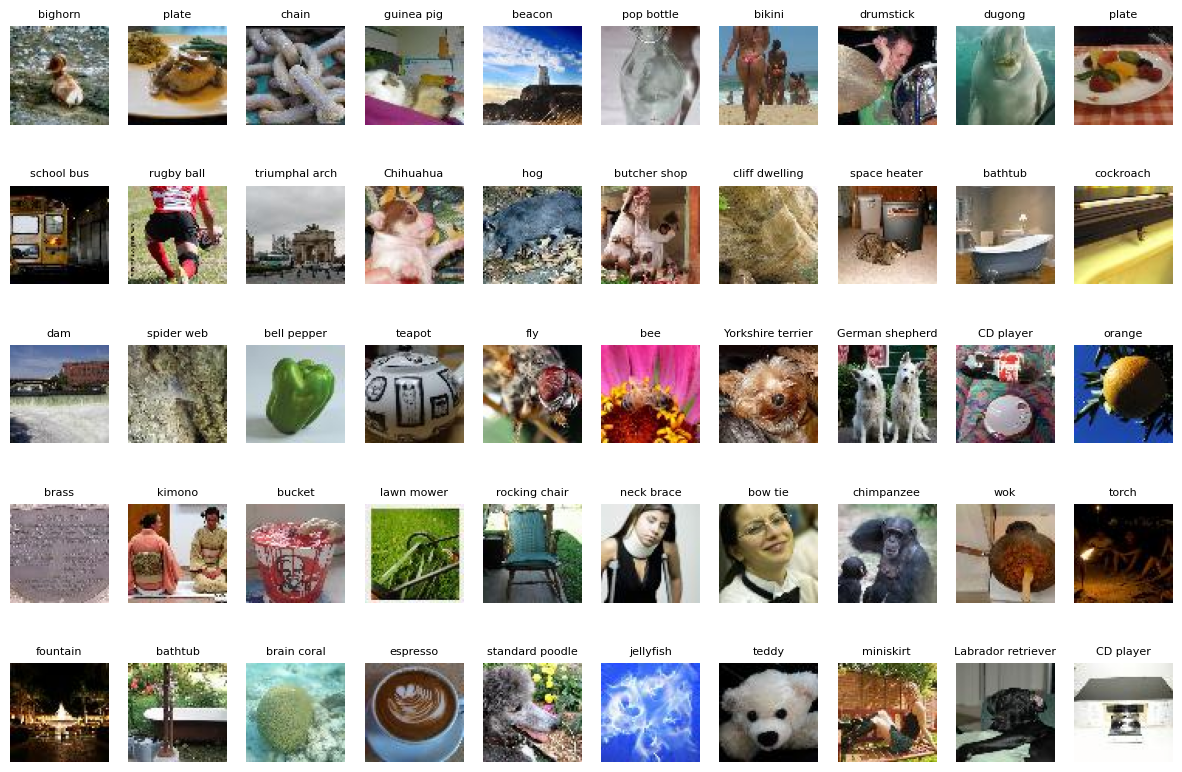

In [11]:
for images, labels in valloader:
  #print(images[2])
  fig, ax = plt.subplots(5,10, figsize=(15,10))
  ax = ax.flatten()
  for i, im in enumerate(images[:50,...]):
    #print(im.size())
    im = (im*im_std[:,None, None])+im_mean[:,None,None]
    ax[i].imshow(im.numpy().transpose(1, 2, 0))
    ax[i].axis('off')
    ax[i].set_title(final_classes[labels[i].item()], fontsize=8)
    #plt.imshow(images[0].numpy().transpose(1, 2, 0))
  plt.show()
  #print(labels[0])
  break

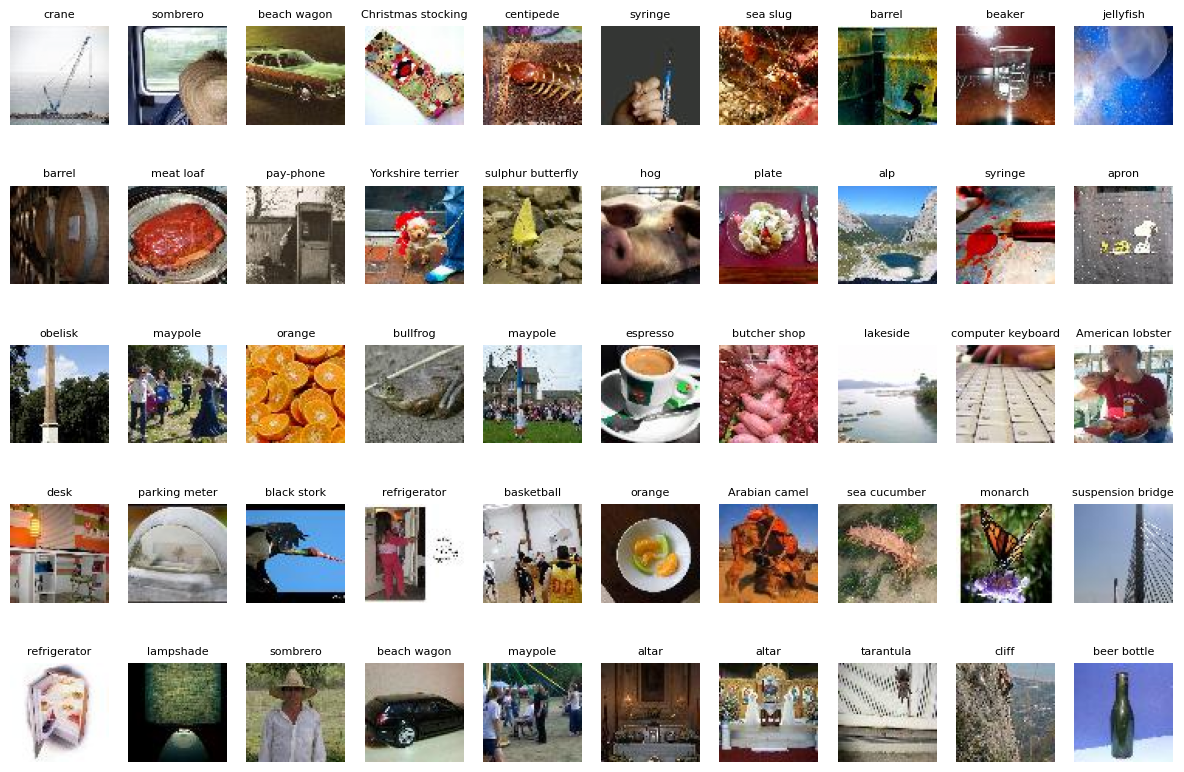

In [12]:
for images, labels in trainloader:
  #print(images[2])
  fig, ax = plt.subplots(5,10, figsize=(15,10))
  ax = ax.flatten()
  for i, im in enumerate(images[:50,...]):
    im = (im*im_std[:,None, None])+im_mean[:,None,None]
    ax[i].imshow(im.numpy().transpose(1, 2, 0))
    ax[i].axis('off')
    ax[i].set_title(final_classes[labels[i].item()], fontsize=8)
    #plt.imshow(images[0].numpy().transpose(1, 2, 0))
  plt.show()
  #print(labels[0])
  break

# Creating the first model using CNN with 8 convolutions

In [13]:
def train_loop(model,  trainloader, optimizer, loss_func, lr_sched=None, log_interval=100, model_name='default', logs={}):
    model.train()
    for batch_id, (images, labels) in enumerate(trainloader):
        optimizer.zero_grad()
        inputs = images.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        loss = loss_func(outputs, labels)
        loss.backward()
        optimizer.step()
        if batch_id % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_id * len(images), len(trainloader.dataset),
                100. * batch_id / len(trainloader), loss.item()))
            logs[model_name]['train_losses'].append(loss.to('cpu').item())
    if lr_sched is not None:
      lr_sched.step()

In [14]:
def test_loop(model, loader, loss_func, logs={}, model_name='default'):
    test_loss = 0.0
    corrects = 0
    model.eval()
    with torch.no_grad():
        for data, labels in loader:
            outputs = model(data.to(device))
            loss = loss_func(outputs, labels.to(device))
            test_loss += loss.item()*len(data)
            _, preds = torch.max(outputs.data,1)
            corrects += torch.sum(preds == labels.to(device))
        test_loss = test_loss/len(loader.dataset)
        #test_losses.append(test_loss)
        test_acc = corrects.double() / len(loader.dataset)
        #test_accuracy.append(test_acc.to('cpu').item()*100)
        logs[model_name]['test_losses'].append(test_loss)
        logs[model_name]['test_accuracy'].append(test_acc.to('cpu').item()*100)
        print('Test Loss: {:.6f}\t Test Accuracy: {:.4f}%'.format(test_loss, test_acc*100))
    return test_acc, test_loss

In [15]:
logs ={}

In [ ]:
#reloading data if needed here

# new acrcheticture

In [ ]:
#reducing batch size due to GPU memory
trainloader_2 = torch.utils.data.DataLoader(trainset, batch_size=8, shuffle=True)
valloader_2 = torch.utils.data.DataLoader(valset, batch_size=8, shuffle=True)

In [ ]:
class Classifier_deep_convs(nn.Module):
  def __init__(self):
    super(Classifier_deep_convs, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=3,out_channels=128,kernel_size=3, padding=1)
    self.BN1 = nn.BatchNorm2d(num_features=128)
    self.conv2 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)
    self.BN2 = nn.BatchNorm2d(num_features=128)

    self.conv2_drop = nn.Dropout2d()

    self.conv3 = nn.Conv2d(in_channels=128,out_channels=256,kernel_size=3, padding=1)
    self.BN3 = nn.BatchNorm2d(num_features=256)
    self.conv4 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1)
    self.BN4 = nn.BatchNorm2d(num_features=256)

    self.conv5 = nn.Conv2d(in_channels=256,out_channels=512,kernel_size=3, padding=1)
    self.BN5 = nn.BatchNorm2d(num_features=512)
    self.conv6 = nn.Conv2d(in_channels=512,out_channels=512,kernel_size=3, padding=1)
    self.BN6 = nn.BatchNorm2d(num_features=512)

    self.fc_mid1 = nn.Linear(32768,8192)
    self.fc_mid2 = nn.Linear(8192,4096)
    self.fc_mid3 = nn.Linear(4096, 2048)
    self.fc_mid4 = nn.Linear(2048, 1024)
    self.fc_mid5 = nn.Linear(1024,512)
    self.fc_mid6 = nn.Linear(512,200)

    self.conv7 = nn.Conv2d(in_channels=512,out_channels=1024,kernel_size=3, padding=1)
    self.BN7 = nn.BatchNorm2d(num_features=1024)
    self.conv8 = nn.Conv2d(in_channels=1024,out_channels=1024,kernel_size=3, padding=1)
    self.BN8 = nn.BatchNorm2d(num_features=1024)

    self.fc1 = nn.Linear(16384,8192)
    self.fc2 = nn.Linear(8192,4096)
    self.fc3 = nn.Linear(4096, 2048)
    self.fc4 = nn.Linear(2048, 1024)
    self.fc5 = nn.Linear(1024,512)
    self.fc6 = nn.Linear(512,200)

  def forward(self, x):
    x = F.relu(self.BN1(self.conv1(x)))
    x = self.conv2_drop(F.max_pool2d(F.relu(self.conv2(x)),2))

    x = self.conv2_drop(F.relu(self.BN3(self.conv3(x))))
    x = self.conv2_drop(F.max_pool2d(F.relu(self.BN4(self.conv4(x))),2))


    x = F.relu(self.BN5(self.conv5(x)))
    x = self.conv2_drop(F.max_pool2d(F.relu(self.BN6(self.conv6(x))),2))
    y = x.view(x.size(0),-1)
    y = F.relu(self.fc_mid1(y))
    y = F.relu(self.fc_mid2(y))
    y = F.relu(self.fc_mid3(y))
    y = F.relu(self.fc_mid4(y))
    y = F.relu(self.fc_mid5(y))
    y = self.fc_mid6(y)
    x = F.relu(self.BN7(self.conv7(x)))
    x = self.conv2_drop(F.max_pool2d(F.relu(self.BN8(self.conv8(x))), 2))
    x = x.view(x.size(0),-1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.relu(self.fc4(x))
    x = F.relu(self.fc5(x))
    x = self.fc6(x)
    return x+y

classifier_4_2 = Classifier_deep_convs()
learning_rate = 0.01
momentum = 0.9
optimizer_4 = optim.SGD(classifier_4_2.parameters(), lr=learning_rate, momentum=momentum)
#exp_lr_scheduler_3 = optim.lr_scheduler.StepLR(optimizer=optimizer, step_size=7, gamma=0.1)
loss_func_4 = nn.CrossEntropyLoss()
device = 'cuda' if torch.cuda.is_available() else 'cpu'
classifier_4_2.to(device)

Classifier_deep_convs(
  (conv1): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (BN1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (BN2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (BN3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (BN4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (BN5): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv6): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (BN6)

In [17]:
#reducing batch size due to GPU memory
trainloader_4 = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)
valloader_4 = torch.utils.data.DataLoader(valset, batch_size=128, shuffle=True)

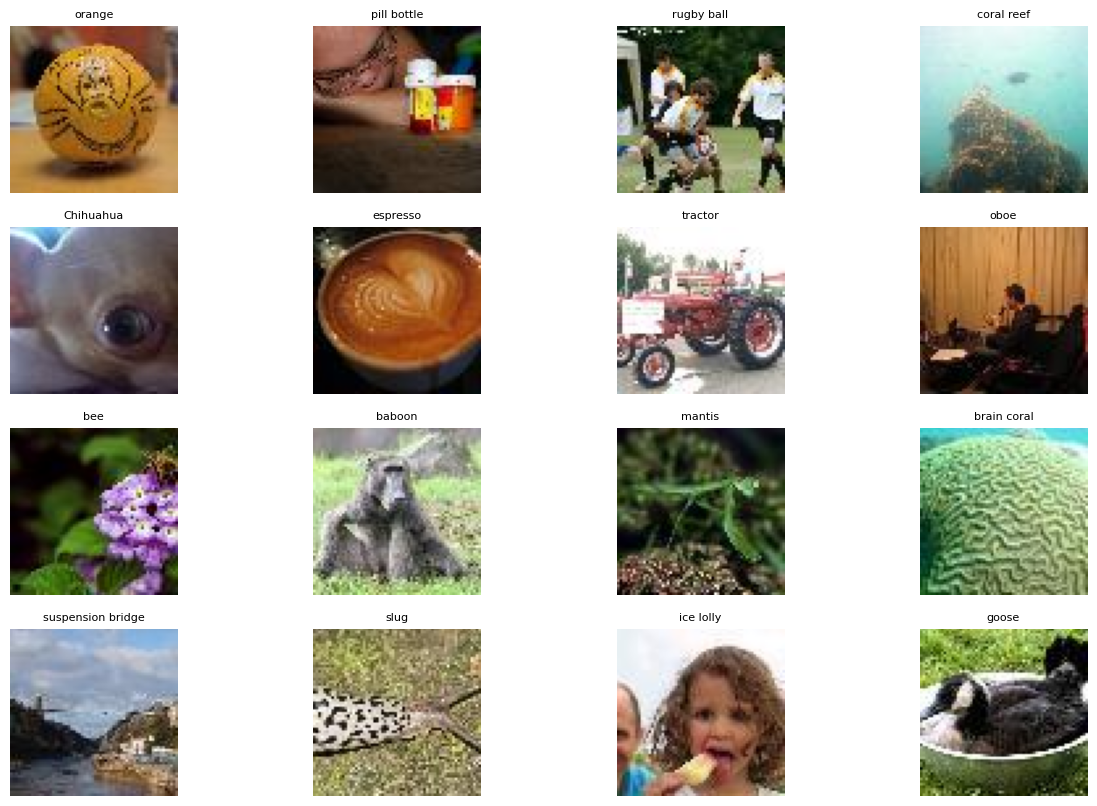

In [18]:
for images, labels in valloader_4:
  #print(images[2])
  fig, ax = plt.subplots(4,4, figsize=(15,10))
  ax = ax.flatten()
  for i, im in enumerate(images[:16,...]):
    #print(im.size())
    im = (im*im_std[:,None, None])+im_mean[:,None,None]
    ax[i].imshow(im.numpy().transpose(1, 2, 0))
    ax[i].axis('off')
    ax[i].set_title(final_classes[labels[i].item()], fontsize=8)
    #plt.imshow(images[0].numpy().transpose(1, 2, 0))
  plt.show()
  #print(labels[0])
  break

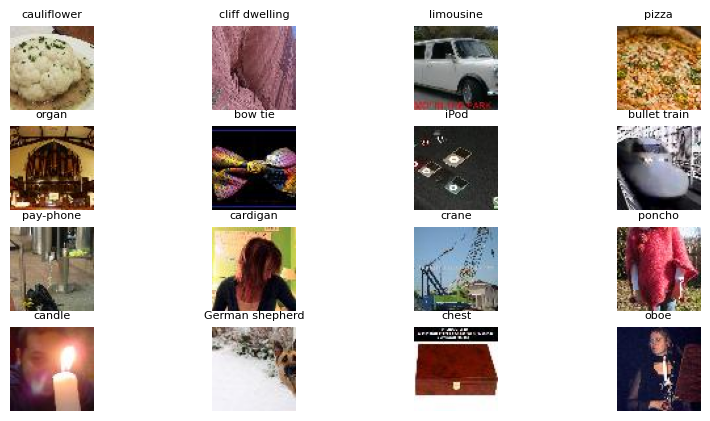

In [19]:
for images, labels in trainloader_4:
  #print(images[2])
  fig, ax = plt.subplots(4,4, figsize=(10,5))
  ax = ax.flatten()
  for i, im in enumerate(images[:16,...]):
    #print(im.size())
    im = (im*im_std[:,None, None])+im_mean[:,None,None]
    ax[i].imshow(im.numpy().transpose(1, 2, 0))
    ax[i].axis('off')
    ax[i].set_title(final_classes[labels[i].item()], fontsize=8)
    #plt.imshow(images[0].numpy().transpose(1, 2, 0))
  plt.show()
  #print(labels[0])
  break

In [22]:
train_losses = []
test_losses = []
test_accuracy = []
epochs = 30
logs['classifier_4_2'] = {'train_losses': train_losses, 'test_losses': test_losses, 'test_accuracy': test_accuracy}

for epoch in range(epochs):
    train_loop(model=classifier_4_2, trainloader=trainloader_4, optimizer=optimizer_4, lr_sched=None, loss_func=loss_func_4,model_name='classifier_4_2', logs=logs)
    test_loop(model=classifier_4_2, loader=valloader_4, loss_func=loss_func_4, model_name='classifier_4_2', logs=logs)

Train Epoch: 0 [0/100000 (0%)]	Loss: 5.292650
Train Epoch: 0 [12800/100000 (13%)]	Loss: 5.302029
Train Epoch: 0 [25600/100000 (26%)]	Loss: 5.290364
Train Epoch: 0 [38400/100000 (38%)]	Loss: 5.282273
Train Epoch: 0 [51200/100000 (51%)]	Loss: 5.208875
Train Epoch: 0 [64000/100000 (64%)]	Loss: 5.194731
Train Epoch: 0 [76800/100000 (77%)]	Loss: 5.193193
Train Epoch: 0 [89600/100000 (90%)]	Loss: 5.249531
Test Loss: 5.272387	 Test Accuracy: 0.7400%
Train Epoch: 1 [0/100000 (0%)]	Loss: 5.092655
Train Epoch: 1 [12800/100000 (13%)]	Loss: 5.049859
Train Epoch: 1 [25600/100000 (26%)]	Loss: 5.077031
Train Epoch: 1 [38400/100000 (38%)]	Loss: 5.034802
Train Epoch: 1 [51200/100000 (51%)]	Loss: 5.007082
Train Epoch: 1 [64000/100000 (64%)]	Loss: 4.988442
Train Epoch: 1 [76800/100000 (77%)]	Loss: 4.905314
Train Epoch: 1 [89600/100000 (90%)]	Loss: 5.023759
Test Loss: 4.916589	 Test Accuracy: 2.7900%
Train Epoch: 2 [0/100000 (0%)]	Loss: 4.688046
Train Epoch: 2 [12800/100000 (13%)]	Loss: 4.770620
Train Epo

KeyboardInterrupt: 

In [23]:
#saving model params
torch.save(classifier_4_2.state_dict(), './classifier_4_2_y.pth')

In [24]:
#saving losses and accuracies
import json

with open('DL_project_models_trackingclf4_2_y.json', 'w') as f:
    json.dump(logs, f)

In [ ]:
from google.colab import files
files.download('./classifier_4.pth')
files.download('DL_project_models_trackingclf4.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('./classifier_4.pth')
files.download('./DL_project_models_trackingclf4.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('classifier_4.pth')
files.download('DL_project_models_trackingclf4.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>